# IMPORTS


In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

NUM_CLASSES = 3
BATCH_SIZE = 128
EPOCHS = 10

# Load the dataset with images

# Animal faces dataset 

3 classes - cat, dog, wild

In [3]:
train_ds2_path = 'data/afhq/train'
test_ds2_path = 'data/afhq/val'

### Image example (label: cat)

In [4]:
tf.keras.preprocessing.image.load_img(train_ds2_path + '/cat/flickr_cat_000014.jpg')

# Prepare data for training. Train and test sample generation

### Reduce the sample for faster training of neural networks during the study

In [5]:
def limit_data(data_dir,n=100):
    a=[]
    for i in os.listdir(data_dir):
        for k,j in enumerate(os.listdir(data_dir+'/'+i)):
            if k>n:continue
            a.append((f'{data_dir}/{i}/{j}',i))
    return pd.DataFrame(a,columns=['filename','class'])

In [6]:
train_df = limit_data('data/afhq/train', 2000)
train_df['class'].value_counts()

cat     2001
dog     2001
wild    2001
Name: class, dtype: int64

In [7]:
test_df = limit_data('data/afhq/val', 400)
test_df['class'].value_counts()

cat     401
dog     401
wild    401
Name: class, dtype: int64

In [8]:
training_generator = ImageDataGenerator(rescale=1./255, # multiply the data by the value provided (after applying all other transformations)
                                        rotation_range=3, # Int. Degree range for random rotations. 
                                        horizontal_flip=True, #  Boolean. Randomly flip inputs horizontally. 
                                        zoom_range=0.2) # Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]

training_dataset = training_generator.flow_from_dataframe(train_df,
                                                     target_size = (64, 64),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     shuffle = True)

Found 6003 validated image filenames belonging to 3 classes.


In [9]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(test_df,
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = True)

Found 1203 validated image filenames belonging to 3 classes.


# Build and train a basic convolutional model with one convolutional layer.

In [75]:
basic = keras.Sequential()

basic.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
basic.add(keras.layers.Flatten())
basic.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

basic.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [76]:
basic_history = basic.fit(training_dataset,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data = test_dataset,
                          verbose=True)

Epoch 1/10
188/188 [==============================] - 12s 63ms/step - loss: 0.9756 - accuracy: 0.6695 - val_loss: 0.4260 - val_accuracy: 0.8362
Epoch 2/10
188/188 [==============================] - 12s 65ms/step - loss: 0.4284 - accuracy: 0.8376 - val_loss: 0.2859 - val_accuracy: 0.8944
Epoch 3/10
188/188 [==============================] - 12s 65ms/step - loss: 0.3585 - accuracy: 0.8666 - val_loss: 0.2483 - val_accuracy: 0.9052
Epoch 4/10
188/188 [==============================] - 12s 65ms/step - loss: 0.3061 - accuracy: 0.8864 - val_loss: 0.2098 - val_accuracy: 0.9252
Epoch 5/10
188/188 [==============================] - 12s 63ms/step - loss: 0.2987 - accuracy: 0.8892 - val_loss: 0.3159 - val_accuracy: 0.8745
Epoch 6/10
188/188 [==============================] - 12s 66ms/step - loss: 0.2638 - accuracy: 0.9042 - val_loss: 0.1925 - val_accuracy: 0.9293
Epoch 7/10
188/188 [==============================] - 12s 65ms/step - loss: 0.2421 - accuracy: 0.9077 - val_loss: 0.2349 - val_accuracy:

In [91]:
_, accuracy = basic.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')

Test accuracy: 92.186%


# Build and train several advanced convolutional models that include dropout and mini-batch normalization layers with different numbers of convolutional layers and parameter values.

### Model 1: 
### 4 convolutional layers, 3 batch normalization layers, 2 dropout layers, softmax activation on the last layer

In [10]:
advanced1 = keras.Sequential()

advanced1.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
advanced1.add(keras.layers.BatchNormalization())

advanced1.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
advanced1.add(keras.layers.BatchNormalization())
advanced1.add(keras.layers.Dropout(0.4))

advanced1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
advanced1.add(keras.layers.BatchNormalization())

advanced1.add(keras.layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
advanced1.add(keras.layers.Dropout(0.4))

advanced1.add(keras.layers.Flatten())
advanced1.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

advanced1.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [11]:
advanced1_history = advanced1.fit(training_dataset,
                                  epochs=EPOCHS,
                                  batch_size=BATCH_SIZE,
                                  validation_data = test_dataset,
                                  verbose=True)

Epoch 1/10
188/188 [==============================] - 15s 77ms/step - loss: 0.8261 - accuracy: 0.6600 - val_loss: 1.6697 - val_accuracy: 0.4057
Epoch 2/10
188/188 [==============================] - 14s 76ms/step - loss: 0.5073 - accuracy: 0.8034 - val_loss: 1.5317 - val_accuracy: 0.5777
Epoch 3/10
188/188 [==============================] - 14s 76ms/step - loss: 0.3946 - accuracy: 0.8509 - val_loss: 0.2801 - val_accuracy: 0.8853
Epoch 4/10
188/188 [==============================] - 14s 76ms/step - loss: 0.3310 - accuracy: 0.8726 - val_loss: 0.2466 - val_accuracy: 0.9119
Epoch 5/10
188/188 [==============================] - 14s 76ms/step - loss: 0.2821 - accuracy: 0.8961 - val_loss: 0.2887 - val_accuracy: 0.8961
Epoch 6/10
188/188 [==============================] - 14s 77ms/step - loss: 0.2695 - accuracy: 0.8987 - val_loss: 0.6666 - val_accuracy: 0.7922
Epoch 7/10
188/188 [==============================] - 15s 78ms/step - loss: 0.2617 - accuracy: 0.9014 - val_loss: 0.1918 - val_accuracy:

In [12]:
_, accuracy = advanced1.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')

Test accuracy: 89.776%


### Model 2 (deeper): 
### 6 convolutional layers, 6 batch normalization layers, 3 dropout layers, softmax activation on the last layer

In [82]:
advanced2 = keras.Sequential()

advanced2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
advanced2.add(keras.layers.BatchNormalization())

advanced2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
advanced2.add(keras.layers.BatchNormalization())
advanced2.add(keras.layers.Dropout(0.4))

advanced2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2.add(keras.layers.BatchNormalization())

advanced2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2.add(keras.layers.BatchNormalization())
advanced2.add(keras.layers.Dropout(0.4))

advanced2.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2.add(keras.layers.BatchNormalization())

advanced2.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2.add(keras.layers.BatchNormalization())
advanced2.add(keras.layers.Dropout(0.4))

advanced2.add(keras.layers.Flatten())

advanced2.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

advanced2.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [83]:
advanced2_history = advanced2.fit(training_dataset,
                                  epochs=EPOCHS,
                                  batch_size=BATCH_SIZE,
                                  validation_data = test_dataset,
                                  verbose=True)

Epoch 1/10
188/188 [==============================] - 169s 897ms/step - loss: 6.8604 - accuracy: 0.7016 - val_loss: 60.9224 - val_accuracy: 0.3333
Epoch 2/10
188/188 [==============================] - 177s 941ms/step - loss: 7.2889 - accuracy: 0.8308 - val_loss: 46.1252 - val_accuracy: 0.4871
Epoch 3/10
188/188 [==============================] - 182s 968ms/step - loss: 6.4688 - accuracy: 0.8671 - val_loss: 8.3282 - val_accuracy: 0.8545
Epoch 4/10
188/188 [==============================] - 174s 927ms/step - loss: 5.4371 - accuracy: 0.8912 - val_loss: 6.4803 - val_accuracy: 0.9052
Epoch 5/10
188/188 [==============================] - 174s 924ms/step - loss: 4.8932 - accuracy: 0.9002 - val_loss: 4.5122 - val_accuracy: 0.9194
Epoch 6/10
188/188 [==============================] - 174s 924ms/step - loss: 4.0527 - accuracy: 0.9130 - val_loss: 46.8139 - val_accuracy: 0.6559
Epoch 7/10
188/188 [==============================] - 174s 926ms/step - loss: 3.4827 - accuracy: 0.9179 - val_loss: 5.655

In [89]:
_, accuracy = advanced2.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')

Test accuracy: 92.436%


### Model 2 without dropout and batch normalization: 
### 6 convolutional layers, 6 batch normalization layers, 3 dropout layers, softmax activation on the last layer

In [86]:
advanced2_no_batch = keras.Sequential()

advanced2_no_batch.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
advanced2_no_batch.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
                       
advanced2_no_batch.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2_no_batch.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
                       
advanced2_no_batch.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
advanced2_no_batch.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

advanced2_no_batch.add(keras.layers.Flatten())

advanced2_no_batch.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

advanced2_no_batch.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [87]:
advanced2_no_batch_history = advanced2_no_batch.fit(training_dataset,         
                                                  epochs=EPOCHS,
                                                  batch_size=BATCH_SIZE,
                                                  validation_data = test_dataset,
                                                  verbose=True)

Epoch 1/10
188/188 [==============================] - 141s 749ms/step - loss: 0.8639 - accuracy: 0.5970 - val_loss: 0.6070 - val_accuracy: 0.7465
Epoch 2/10
188/188 [==============================] - 146s 777ms/step - loss: 0.5321 - accuracy: 0.7898 - val_loss: 0.4285 - val_accuracy: 0.8396
Epoch 3/10
188/188 [==============================] - 145s 774ms/step - loss: 0.3642 - accuracy: 0.8604 - val_loss: 0.3195 - val_accuracy: 0.8845
Epoch 4/10
188/188 [==============================] - 147s 782ms/step - loss: 0.3198 - accuracy: 0.8789 - val_loss: 0.2554 - val_accuracy: 0.9011
Epoch 5/10
188/188 [==============================] - 151s 802ms/step - loss: 0.2808 - accuracy: 0.8967 - val_loss: 0.3304 - val_accuracy: 0.8828
Epoch 6/10
188/188 [==============================] - 151s 801ms/step - loss: 0.2600 - accuracy: 0.9009 - val_loss: 0.2480 - val_accuracy: 0.9069
Epoch 7/10
188/188 [==============================] - 147s 782ms/step - loss: 0.2401 - accuracy: 0.9097 - val_loss: 0.1742 -

In [88]:
_, accuracy = advanced2_no_batch.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')

Test accuracy: 95.345%


## Plot loss and accuracy curves for the above models

In [94]:
models_history = [
    (basic_history, 'Basic'),
    (advanced1_history, 'Advanced Model 1: simple'),
    (advanced2_history, 'Advanced Model 2: deep'),
    (advanced2_no_batch_history, 'Advanced model 2: deep without batch normalization')
]

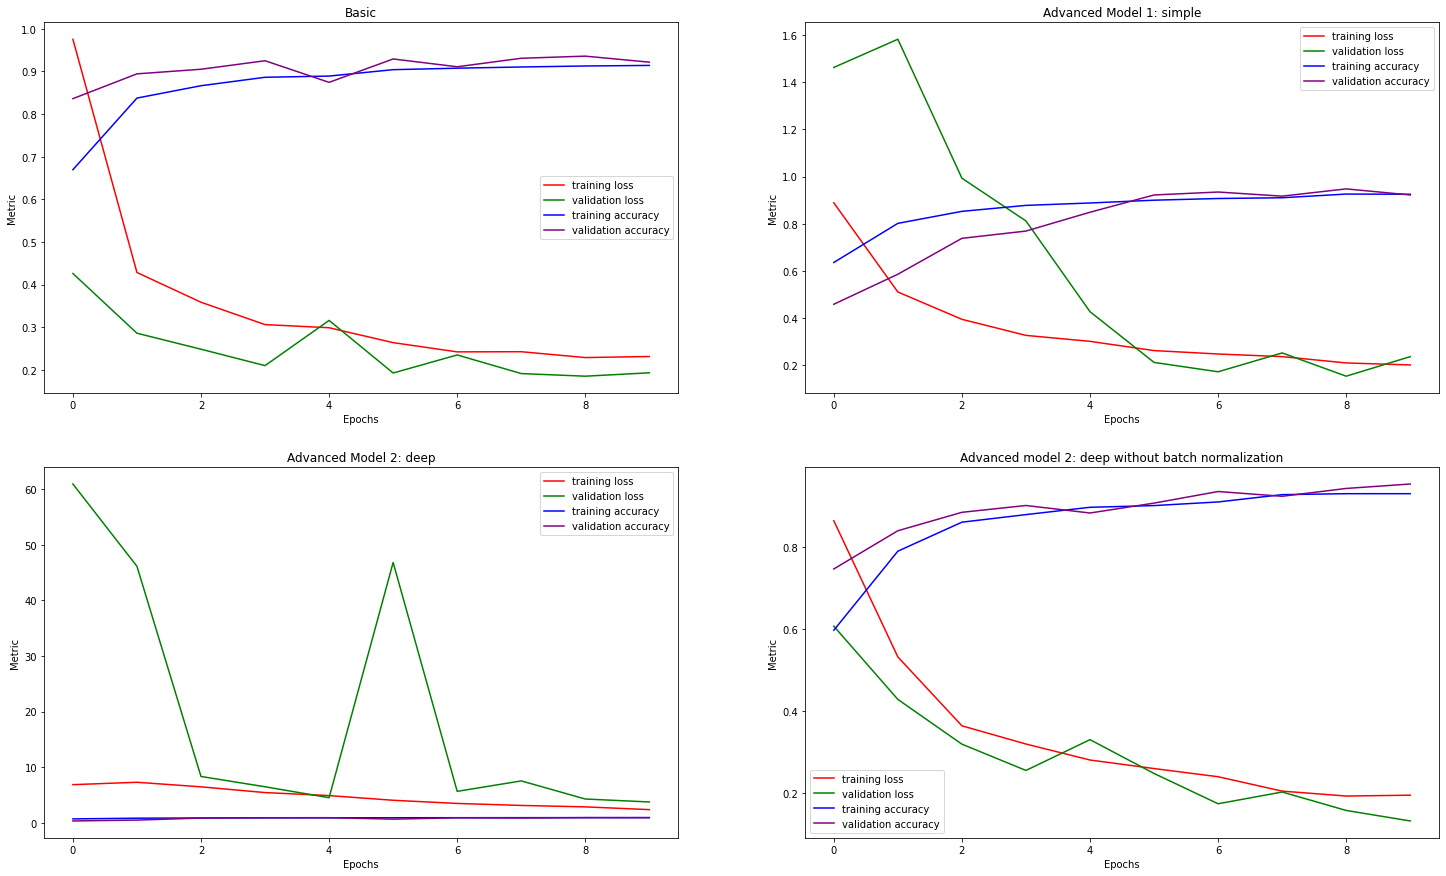

In [99]:
fig, axs = plt.subplots(2, 2, figsize = (25, 15))
i,j = 0,0
for model in models_history:
    axs[i][j].plot(range(EPOCHS), model[0].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), model[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), model[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), model[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title(model[1])
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

## First judgments: 
### - The models with more layers gave better result on the test set.
### - There is no overfitting in the models. Only a small one in model 2 with normalization
### - Surprisingly, the model with the batch normalization and dropout layers not only took longer to learn, but also showed worse results than the model without them. Moreover, it had a slight overlearning 

### NOTE: **Considering that both models showed almost the same result, the simpler model will be used in further research as the computational ability is limited

# Investigate the influence of the padding and strides parameters of the convolution layer, as well as the size of the kernel on the result.

- Padding is simply a process of adding layers of zeros to our input images to increase the informativeness of the border pixels of the image
- Stride - kernel shift step size

In [37]:
def build_model(kernel_size, strides, padding):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, kernel_size=kernel_size, activation='relu', padding=padding, input_shape=(64, 64, 3)))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(32, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Conv2D(64, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(64, kernel_size=kernel_size, strides=strides, padding=padding, activation='relu'))
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])
    
    return model

In [38]:
results = []
kernel_sizes = [(3,3), (5,5)]
strides = [2,3,5]
paddings  = ['same', 'valid']

for kernel_size in kernel_sizes:
    print(f"Kernel size: {kernel_size}")
    for stride in strides:
        print(f"Stride: {stride}")
        for padding in paddings:
            try:
                model = build_model(kernel_size, stride, padding)

                history = model.fit(training_dataset,
                                   epochs=EPOCHS,
                                   batch_size=BATCH_SIZE,
                                   validation_data=test_dataset,
                                   verbose=False)

                _, accuracy = model.evaluate(test_dataset, verbose = 0)

                print(f'''
                    Padding: {padding} --- Model_accuracy: {accuracy}
                ''')

                results.append(
                    {
                        "kernel_size": kernel_size,
                        "strides": stride,
                        "padding": padding,
                        "history": history,
                        "accuracy": accuracy
                    }
                )
            except :
                print("Negative dimension size ")
                pass

Kernel size: (3, 3)
Stride: 2

                    Padding: same --- Model_accuracy: 0.942643404006958
                

                    Padding: valid --- Model_accuracy: 0.8861180543899536
                
Stride: 3

                    Padding: same --- Model_accuracy: 0.9201995134353638
                

                    Padding: valid --- Model_accuracy: 0.940980851650238
                
Stride: 5

                    Padding: same --- Model_accuracy: 0.8154613375663757
                
Negative dimension size 
Kernel size: (5, 5)
Stride: 2

                    Padding: same --- Model_accuracy: 0.9326683282852173
                

                    Padding: valid --- Model_accuracy: 0.9351620674133301
                
Stride: 3

                    Padding: same --- Model_accuracy: 0.9451371431350708
                

                    Padding: valid --- Model_accuracy: 0.8636741638183594
                
Stride: 5

                    Padding: same --- Model_accuracy:

In [52]:
len(results)

10

In [49]:
fig, axs = plt.subplots(5, 2, figsize = (25, 29))
i,j = 0,0
for result in results:
    axs[i][j].plot(range(EPOCHS), result['history'].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), result['history'].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), result['history'].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), result['history'].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title('KErnel size:  %s Strides: %s Padding: %s Accuracy: %s' % (result['kernel_size'], result['strides'], result['padding'], np.round(result['accuracy'],3)))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

## Conclusions:
### - For a fixed dimension of the convolution kernel, better results are shown by networks with smaller strides values and the padding = "same", which means that the input image is half padded. 
### - The exception was the case with strides equal to 3 and kernel equal to (3,3). There was an equally good result both with and without padding. This is probably due to the fact that with such parameters, the informativity of the pixels that were activated fewer times was not significant.
### - No significant overfitting of the models is observed. However, in some cases you can see how the accuracy curve on the training sample slightly jumps over the accuracy curve on the test sample after the 7-8th epoch.
### - The accuracy of this network does not improve with increasing the size of the convolution kernel
### - The best model with 94,3% accuracy was achieved with the following parameters: kernel size - (3,3), strides - 2, padding - 'same'

# Image recognition from a test sample

In [14]:
best_model_anim = advanced1

(1, 64, 64, 3)
(64, 64, 3)


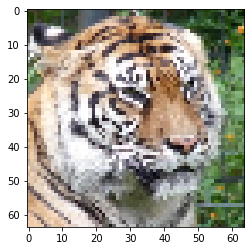

In [15]:
batch=next(test_dataset)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
image=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (image.shape)
plt.imshow(image)

In [19]:
pred_anim = best_model_anim.predict(batch[0])
print(f'class indices: {test_dataset.class_indices}')
print(f'predicted label: {np.argmax(pred_anim)}')

1/1 [==============================] - 0s 11ms/step
class indices: {'cat': 0, 'dog': 1, 'wild': 2}
predicted label: 2
